In [2]:
import pandas as pd

df = pd.read_csv("../data/processed/cicids_binary_clean.csv")

print(df.shape)


(1048575, 79)


In [3]:
print(df.duplicated().sum())

373767


In [4]:
df = df.drop_duplicates()

In [5]:
print(df.duplicated().sum())

0


In [6]:
X = df.drop("BinaryLabel", axis=1)
y = df["BinaryLabel"]

In [7]:
print("Label in X?", "Label" in X.columns)

Label in X? False


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Split done")

Split done


In [9]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Handle inf again just in case
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(0)
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(0)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling complete")


Scaling complete


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42, n_jobs=-1)

rf.fit(X_train_scaled, y_train)

print("Model trained")


Model trained


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[116143      0]
 [     1  18818]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    116143
           1       1.00      1.00      1.00     18819

    accuracy                           1.00    134962
   macro avg       1.00      1.00      1.00    134962
weighted avg       1.00      1.00      1.00    134962



In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:,1]))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9999925905069575
ROC-AUC: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    116143
           1       1.00      1.00      1.00     18819

    accuracy                           1.00    134962
   macro avg       1.00      1.00      1.00    134962
weighted avg       1.00      1.00      1.00    134962



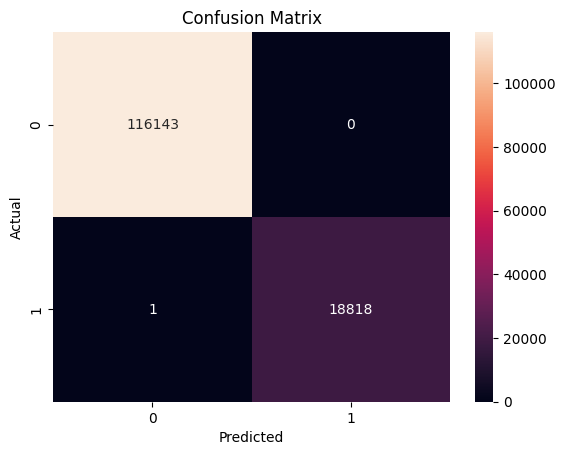

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [14]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9999925905069575

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    116143
           1       1.00      1.00      1.00     18819

    accuracy                           1.00    134962
   macro avg       1.00      1.00      1.00    134962
weighted avg       1.00      1.00      1.00    134962



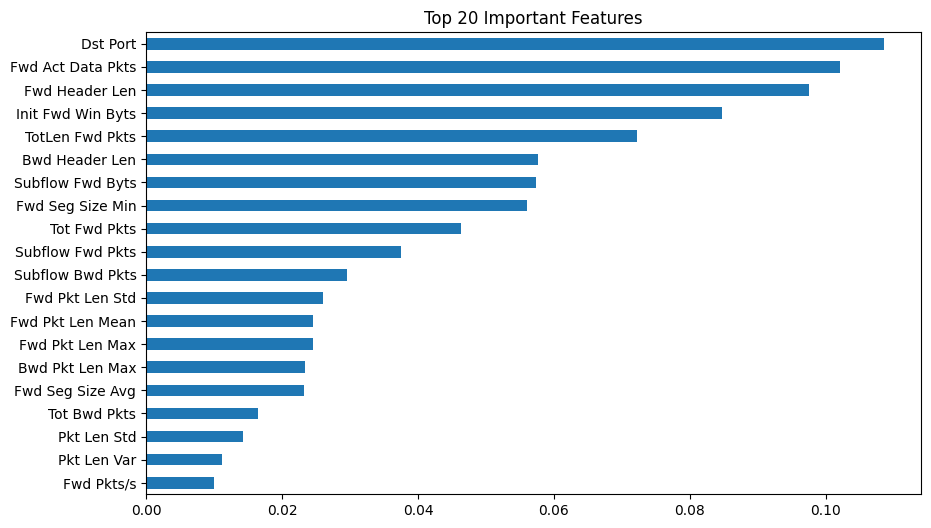

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importance.head(20).plot(kind='barh')
plt.title("Top 20 Important Features")
plt.gca().invert_yaxis()
plt.show()


In [15]:
import joblib

joblib.dump(rf, "../models/random_forest_ids.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

['../models/scaler.pkl']

In [16]:
import json

with open("../models/feature_columns.json", "w") as f:
    json.dump(list(X_train.columns), f)

In [41]:
print(X.columns)

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Siz

In [17]:
print("Train Accuracy:", rf.score(X_train_scaled, y_train))
print("Test Accuracy:", rf.score(X_test_scaled, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.9999925905069575


In [18]:
print("Label in X?", "Label" in X.columns)

Label in X? False
